In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

[[ 0.07196691 -0.59014237]
 [-0.96928725  0.26181908]
 [-0.68495515 -0.71555943]
 ...
 [-0.5713026   0.01200994]
 [-0.71398656  0.75368951]
 [-0.74683644 -0.70672481]]
[1 0 0 ... 1 0 0]


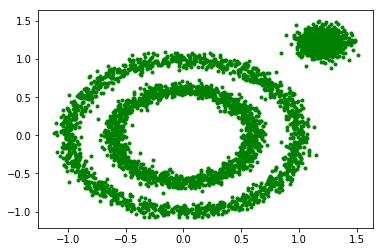

In [39]:
# X1是点的坐标集合，y1是分类0或者1
X1, y1 = datasets.make_circles(n_samples=3000, factor=.6, noise=.05)
X2, y2 = datasets.make_blobs(n_samples=800, n_features=2, centers=[[1.2, 1.2]], cluster_std=[[.1]], random_state=8)
X = np.concatenate((X1, X2))
plt.scatter(X[:, 0], X[:, 1], color='g', marker='.')
plt.show()

array([ 0.59647999, -0.57210149, -0.66293067, ...,  1.08782267,
        1.26027797,  1.18662794])

[0 1 0 ... 2 2 2]


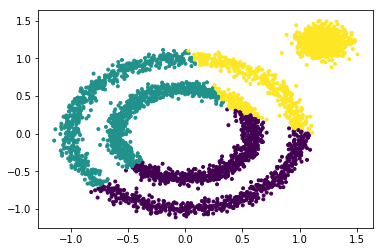

In [18]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(X)
print(y_pred)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='.')
plt.show()

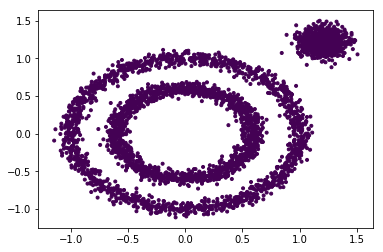

In [19]:
from sklearn.cluster import DBSCAN
y_pred = DBSCAN().fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='.')
plt.show()

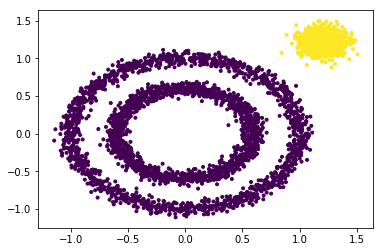

In [27]:
# 调节DBSCAN的默认参数eps默认0.5 与 min_samples默认5
# ?DBSCAN()
y_pred = DBSCAN(eps=0.2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='.')
plt.show()

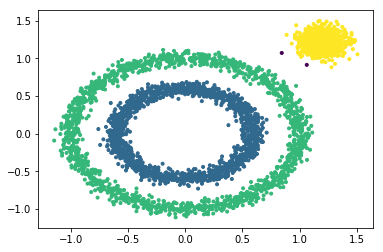

In [36]:
y_pred = DBSCAN(eps=0.1, min_samples=4).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='.')
plt.show()


1）eps： DBSCAN算法参数，即我们的ϵϵ-邻域的距离阈值，和样本距离超过ϵϵ的样本点不在ϵϵ-邻域内。默认值是0.5.一般需要通过在多组值里面选择一个合适的阈值。eps过大，则更多的点会落在核心对象的ϵϵ-邻域，此时我们的类别数可能会减少， 本来不应该是一类的样本也会被划为一类。反之则类别数可能会增大，本来是一类的样本却被划分开。

2）min_samples： DBSCAN算法参数，即样本点要成为核心对象所需要的ϵϵ-邻域的样本数阈值。默认值是5. 一般需要通过在多组值里面选择一个合适的阈值。通常和eps一起调参。在eps一定的情况下，min_samples过大，则核心对象会过少，此时簇内部分本来是一类的样本可能会被标为噪音点，类别数也会变多。反之min_samples过小的话，则会产生大量的核心对象，可能会导致类别数过少。

3）metric：最近邻距离度量参数。可以使用的距离度量较多，一般来说DBSCAN使用默认的欧式距离（即p=2的闵可夫斯基距离）就可以满足我们的需求。可以使用的距离度量参数有：

- 欧式距离 “euclidean”: $\sqrt{\sum\limits_{i=1}^{n}(x_i-y_i)^2}$。
- 曼哈顿距离 “manhattan”： $\sum\limits_{i=1}^{n}|x_i-y_i|$。
- 切比雪夫距离“chebyshev”: $max|x_i-y_i|  (i = 1,2,...n)$。
- 闵可夫斯基距离 “minkowski”: $\sqrt[p]{\sum\limits_{i=1}^{n}(|x_i-y_i|)^p}$，p=1为曼哈顿距离， p=2为欧式距离。
- 带权重闵可夫斯基距离 “wminkowski”: $\sqrt[p]{\sum\limits_{i=1}^{n}(w*|x_i-y_i|)^p}$，其中w为特征权重。

- 标准化欧式距离 “seuclidean”: 即对于各特征维度做了归一化以后的欧式距离。此时各样本特征维度的均值为0，方差为1。

- 马氏距离“mahalanobis”：$\sqrt{(x-y)^TS^{-1}(x-y)}$其中，$S^{-1}$为样本协方差矩阵的逆矩阵。当样本分布独立时， S为单位矩阵，此时马氏距离等同于欧式距离。

还有一些其他不是实数的距离度量，一般在DBSCAN算法用不上，这里也就不列了。

4）algorithm：最近邻搜索算法参数，算法一共有三种，第一种是蛮力实现，第二种是KD树实现，第三种是球树实现。这三种方法在K近邻法(KNN)原理小结中都有讲述，如果不熟悉可以去复习下。对于这个参数，一共有4种可选输入，‘brute’对应第一种蛮力实现，‘kd_tree’对应第二种KD树实现，‘ball_tree’对应第三种的球树实现， ‘auto’则会在上面三种算法中做权衡，选择一个拟合最好的最优算法。需要注意的是，如果输入样本特征是稀疏的时候，无论我们选择哪种算法，最后scikit-learn都会去用蛮力实现‘brute’。个人的经验，一般情况使用默认的 ‘auto’就够了。 如果数据量很大或者特征也很多，用"auto"建树时间可能会很长，效率不高，建议选择KD树实现‘kd_tree’，此时如果发现‘kd_tree’速度比较慢或者已经知道样本分布不是很均匀时，可以尝试用‘ball_tree’。而如果输入样本是稀疏的，无论你选择哪个算法最后实际运行的都是‘brute’。

5）leaf_size：最近邻搜索算法参数，为使用KD树或者球树时， 停止建子树的叶子节点数量的阈值。这个值越小，则生成的KD树或者球树就越大，层数越深，建树时间越长，反之，则生成的KD树或者球树会小，层数较浅，建树时间较短。默认是30. 因为这个值一般只影响算法的运行速度和使用内存大小，因此一般情况下可以不管它。

6） p: 最近邻距离度量参数。只用于闵可夫斯基距离和带权重闵可夫斯基距离中p值的选择，p=1为曼哈顿距离， p=2为欧式距离。如果使用默认的欧式距离不需要管这个参数。

以上就是DBSCAN类的主要参数介绍，其实需要调参的就是两个参数eps和min_samples，这两个值的组合对最终的聚类效果有很大的影响。